In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
import yfinance as yf
from importlib import reload

# Silencing a Pandas warning about date parsing
import warnings
warnings.filterwarnings("ignore", message="Could not infer format")

pd.set_option('max_colwidth', 400)

In [93]:
stocks = pd.read_csv("trading_data/stocks_cleaned.csv",
                     parse_dates=["Traded", "Filed", "Quarter"])

In [69]:
stocks.head()[["Traded", "Filed", "Quarter"]]

,Traded,Filed,Quarter
0,2013-12-18,2014-01-03,2014-01-01
1,2013-12-30,2014-01-07,2014-01-01
2,2013-12-30,2014-01-07,2014-01-01
3,2013-12-30,2014-01-07,2014-01-01
4,2013-12-30,2014-01-07,2014-01-01


In [4]:
test = stocks[stocks.Quarter >= "2023-01-01"]
train = stocks[stocks.Quarter < pd.to_datetime("2023-01-01")]
print(train.shape, test.shape)

(34855, 24) (4694, 24)


## Stock trading over time

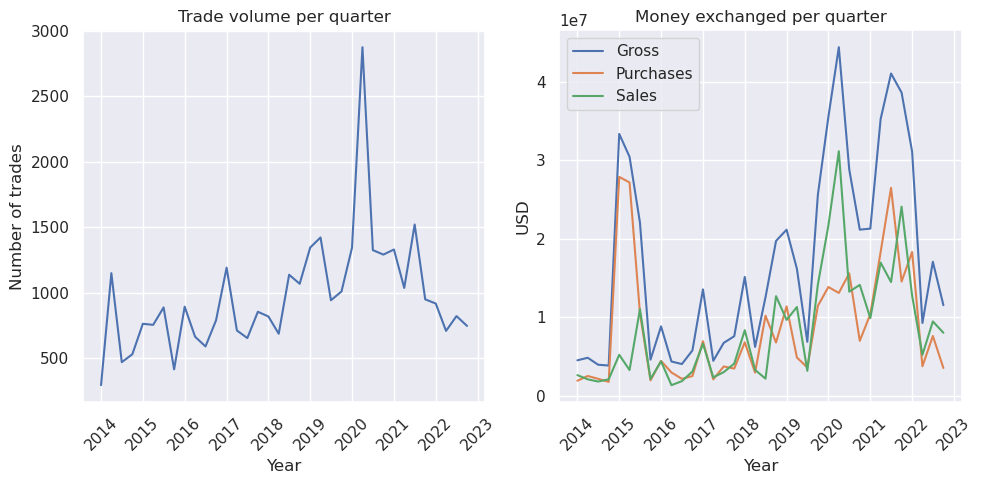

In [5]:
import matplotlib.dates as mdates
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(train.groupby("Quarter").count()["Traded"], ax=axs[0])
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Number of trades")
axs[0].set_title("Trade volume per quarter")
axs[0].tick_params(axis="x", labelrotation=45)
sns.lineplot(train.groupby("Quarter")["Min_Trade_Size"].sum(), ax=axs[1], label="Gross")
sns.lineplot(train[train.Transaction == "Purchase"].groupby("Quarter")["Min_Trade_Size"].sum(), ax=axs[1], label="Purchases")
sns.lineplot(train[train.Transaction.str.startswith("Sale")].groupby("Quarter")["Min_Trade_Size"].sum(), ax=axs[1], label="Sales")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("USD")
# axs[1].set_yscale("log")
axs[1].set_title("Money exchanged per quarter");
axs[1].tick_params(axis="x", labelrotation=45)
plt.tight_layout();

## What issues do companies lobby?

In [6]:
import scripts.data_extraction
reload(scripts.data_extraction)
from scripts.data_extraction import issue_codes_for_company

big_tech = pd.DataFrame()
for company_name in ["Microsoft", "Apple", "Amazon", "Google"]:
    company_counts = issue_codes_for_company(company_name)
    company_counts["Company"] = company_name
    big_tech = pd.concat([big_tech, company_counts])
    big_tech.sort_values(by="issue_code", inplace=True)
    
    


These companies lobby a diverse range of issues, also differing significantly from company to company. 

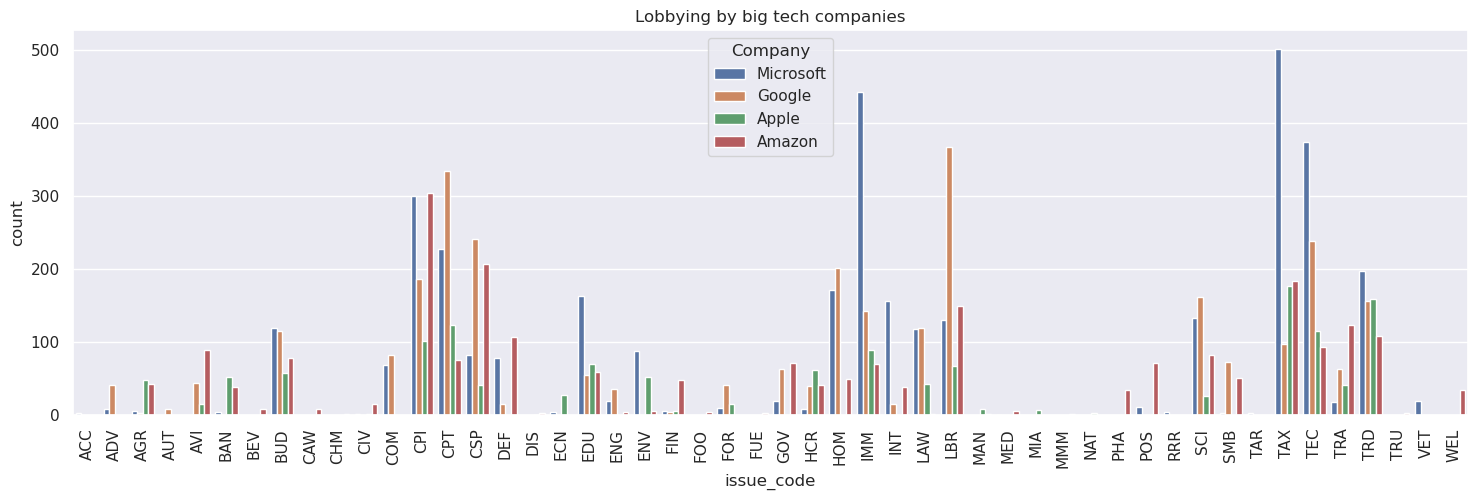

In [7]:
plt.figure(figsize=(18,5))
sns.barplot(big_tech, x="issue_code", y="count", hue="Company")
plt.title("Lobbying by big tech companies")
plt.xticks(rotation=90);

For Exxon Mobil, we see a lot of lobbying for ENG (Energy/Nuclear), more so than FUE (Fuel/Gas/Oil). But the biggest issue is taxation!

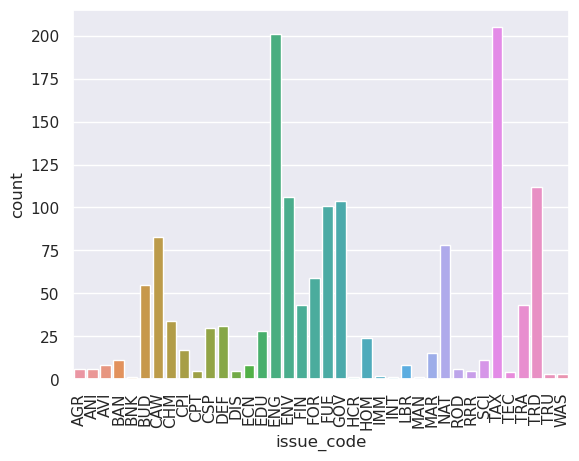

In [101]:
sns.barplot(issue_codes_for_company("Exxon Mobil"), x="issue_code", y="count")
plt.xticks(rotation=90);

## Comparing trading and lobbying

We'll examine the issue codes for which there's a very clear relation to one or more stock categories. To control for external effects on stock trading as a whole (there is both a gradual upward trend in trade volume, and a large spike in 2020 due to COVID), we'll also normalize the trading data by dividing by the quarterly trading gross, totaled across all stock categories.

In [71]:
import scripts.data_extraction
reload(scripts.data_extraction)
from scripts.data_extraction import stock_and_lobbying_totals

def plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name):
    totals = stock_and_lobbying_totals(issue_codes, stock_cats)
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    sns.lineplot(totals.lobbying_total, ax=axs[0])
    axs[0].set_ylabel("Total lobbying expenditure")
    axs[0].set_title(f"Lobbying totals")
    axs[0].tick_params(axis="x", rotation=45)
    sns.lineplot(totals.stocks_gross, ax=axs[1])
    axs[1].set_ylabel("Gross trading (USD)")
    axs[1].set_title(f"Gross stock trading")
    axs[1].tick_params(axis="x", rotation=45)
    sns.lineplot(totals.stocks_gross, ax=axs[2])
    axs[2].set_ylabel("Purchases - sales (USD)")
    axs[2].set_title(f"Net stock trading")
    axs[2].tick_params(axis="x", rotation=45)
    sns.lineplot(totals.stocks_gross_frac, ax=axs[3])
    axs[3].set_ylabel("Fraction")
    axs[3].set_title(f"Fraction of gross stock trading")
    axs[3].tick_params(axis="x", rotation=45)
    fig.suptitle(category_name.upper())
    plt.tight_layout()
    


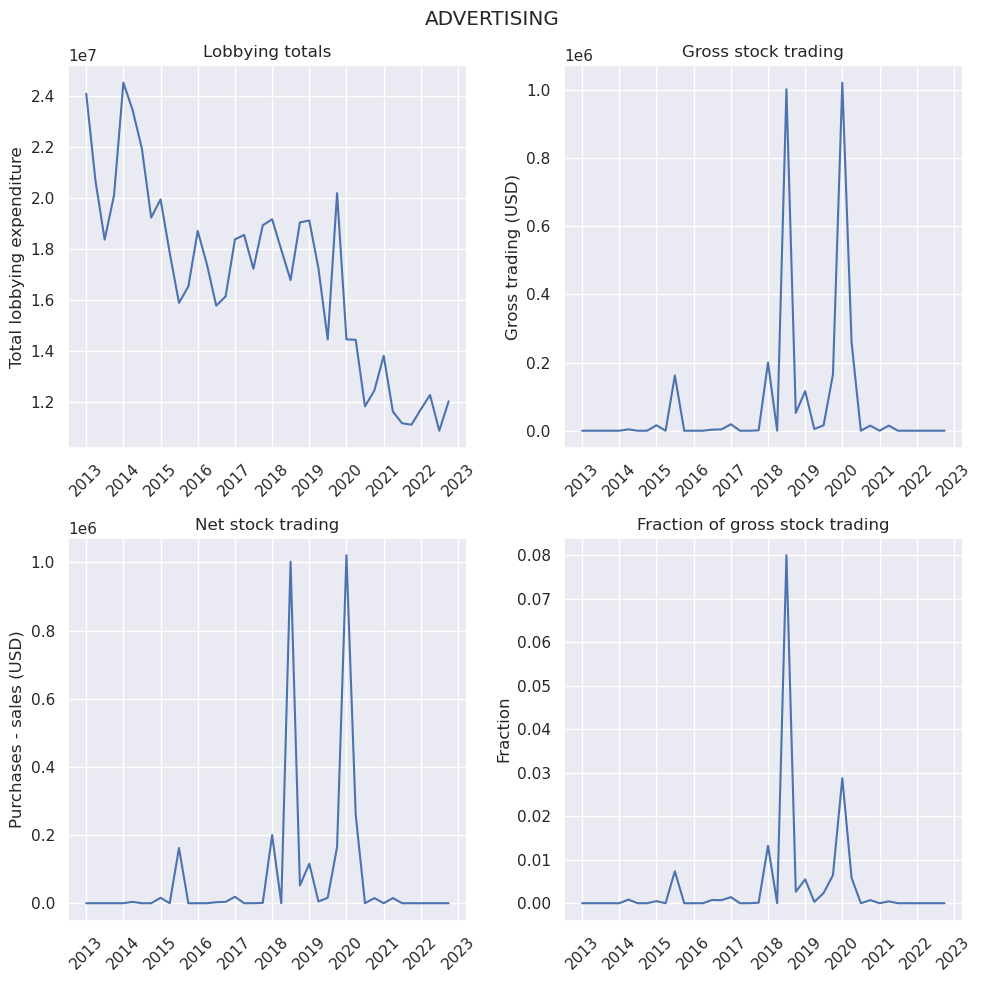

In [72]:
issue_codes = "ADV"
stock_cats = "Advertising Agencies"
category_name = "Advertising"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

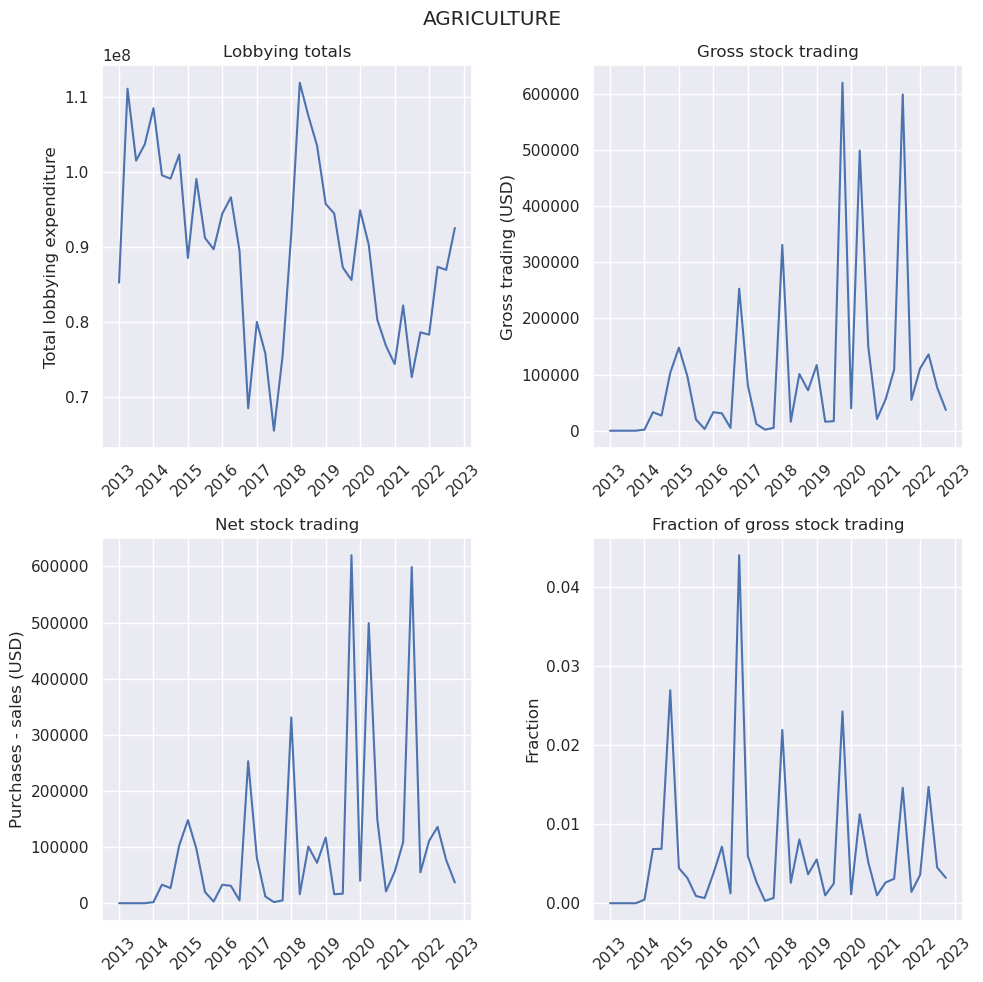

In [73]:
issue_codes = "AGR"
stock_cats = ["Agricultural Inputs", "Farm & Heavy Construction Machinery", "Farm Products"]
category_name = "Agriculture"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

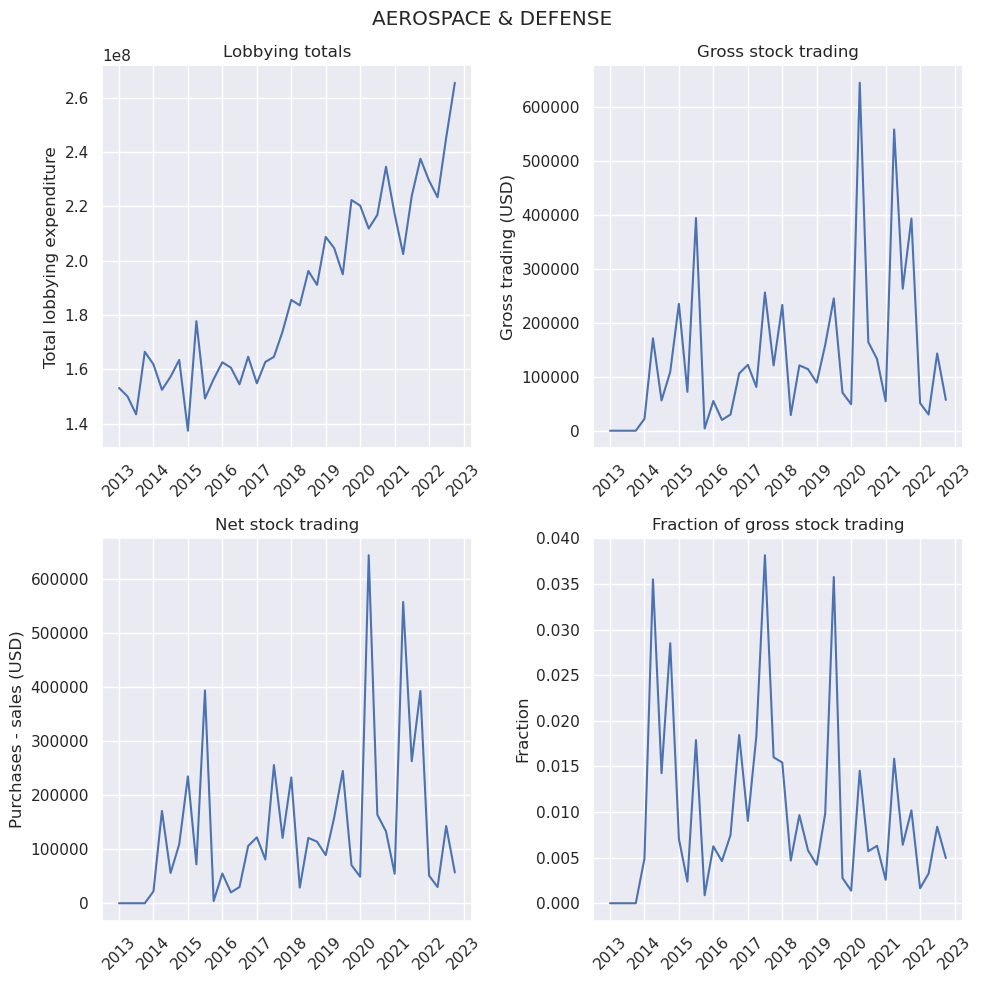

In [74]:
issue_codes = ["AER", "DEF"]
stock_cats = "Aerospace & Defense"
category_name = "Aerospace & Defense"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

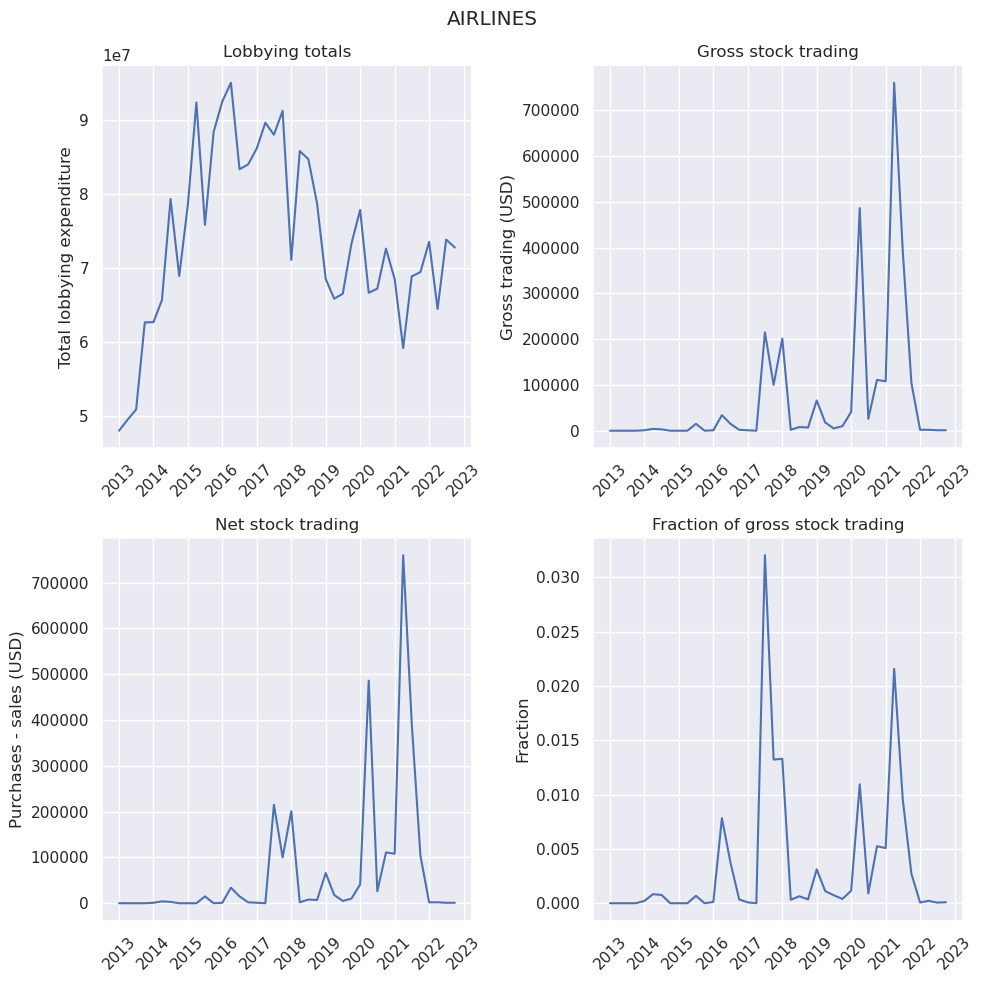

In [75]:
issue_codes = ["AVI"]
stock_cats = ["Airlines", "Airports & Air Services"]
category_name = "Airlines"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

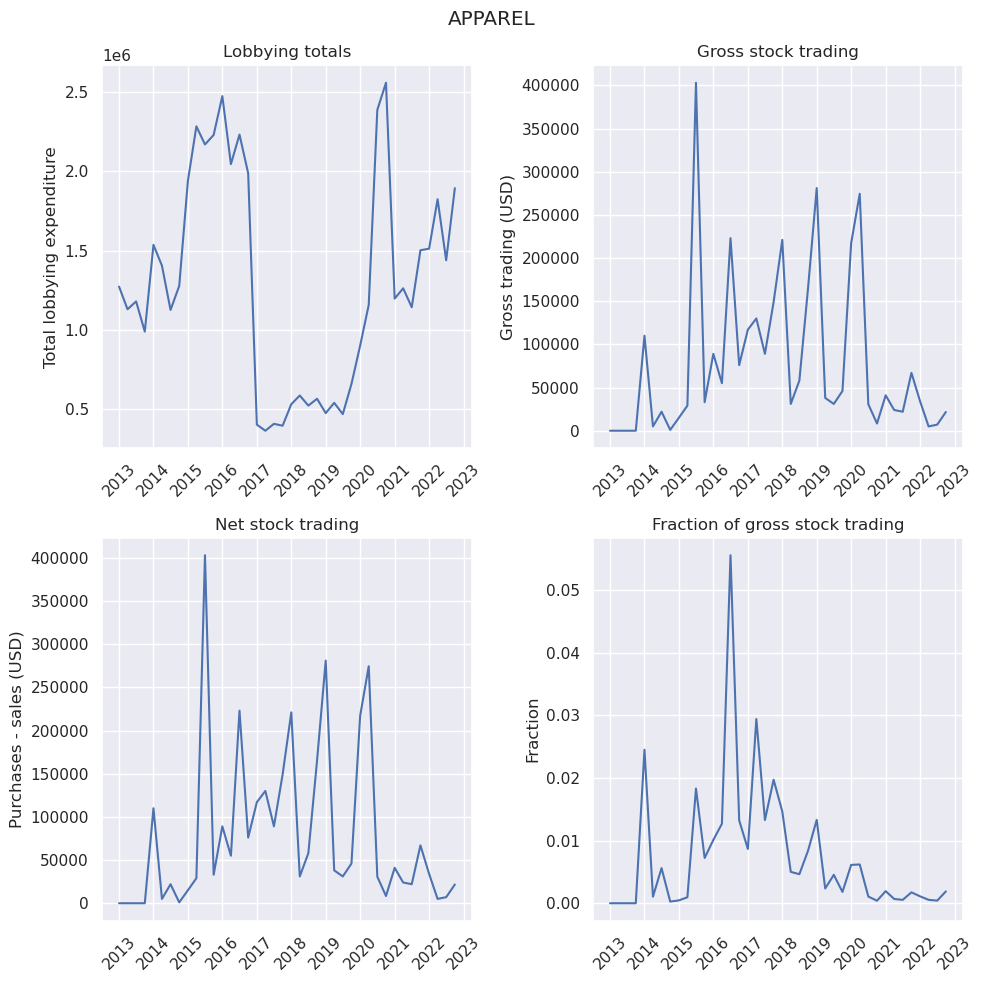

In [76]:
issue_codes = "APP"
stock_cats = ["Apparel Manufacturing", "Apparel Retail", "Footwear and Accessories", "Luxury Goods"]
category_name = "Apparel"

plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

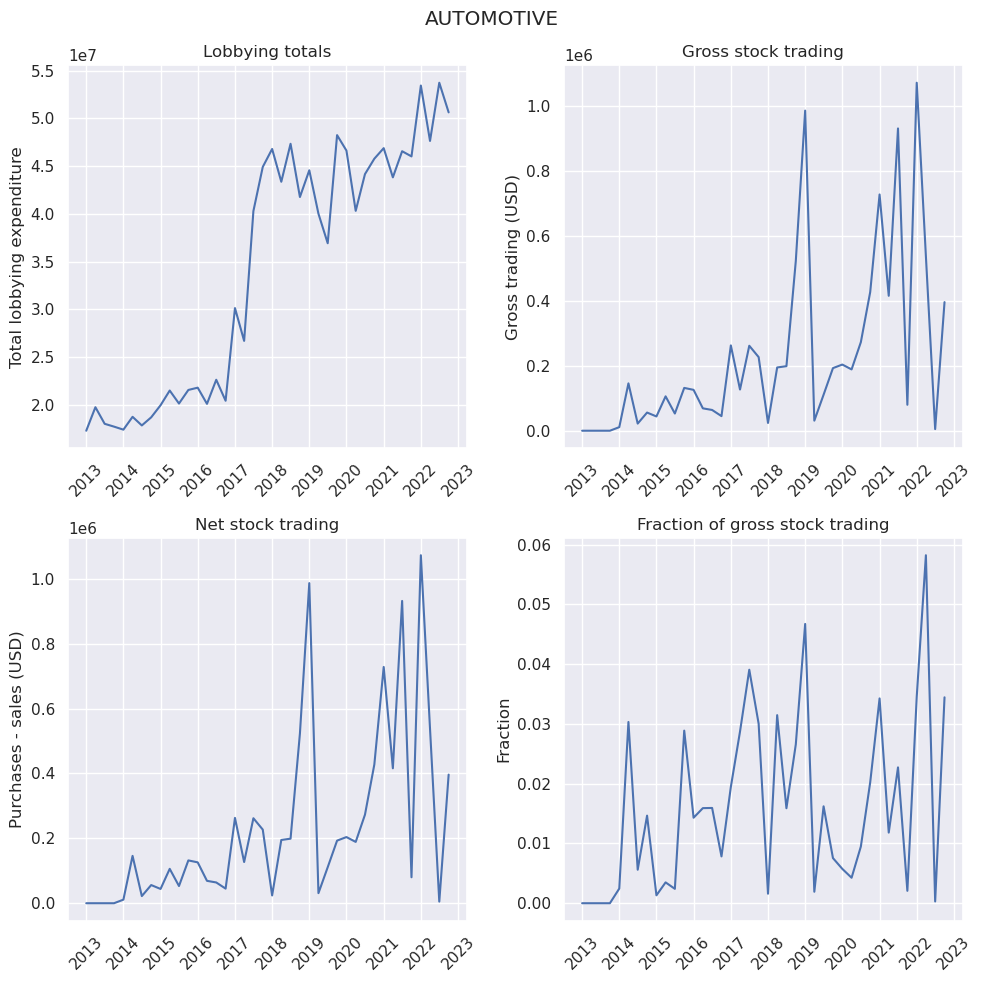

In [77]:
issue_codes = "AUT"
stock_cats = ["Auto & Truck Dealerships", "Auto Manufacturers", "Auto Parts", "Recreational Vehicles"]
category_name = "Automotive"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

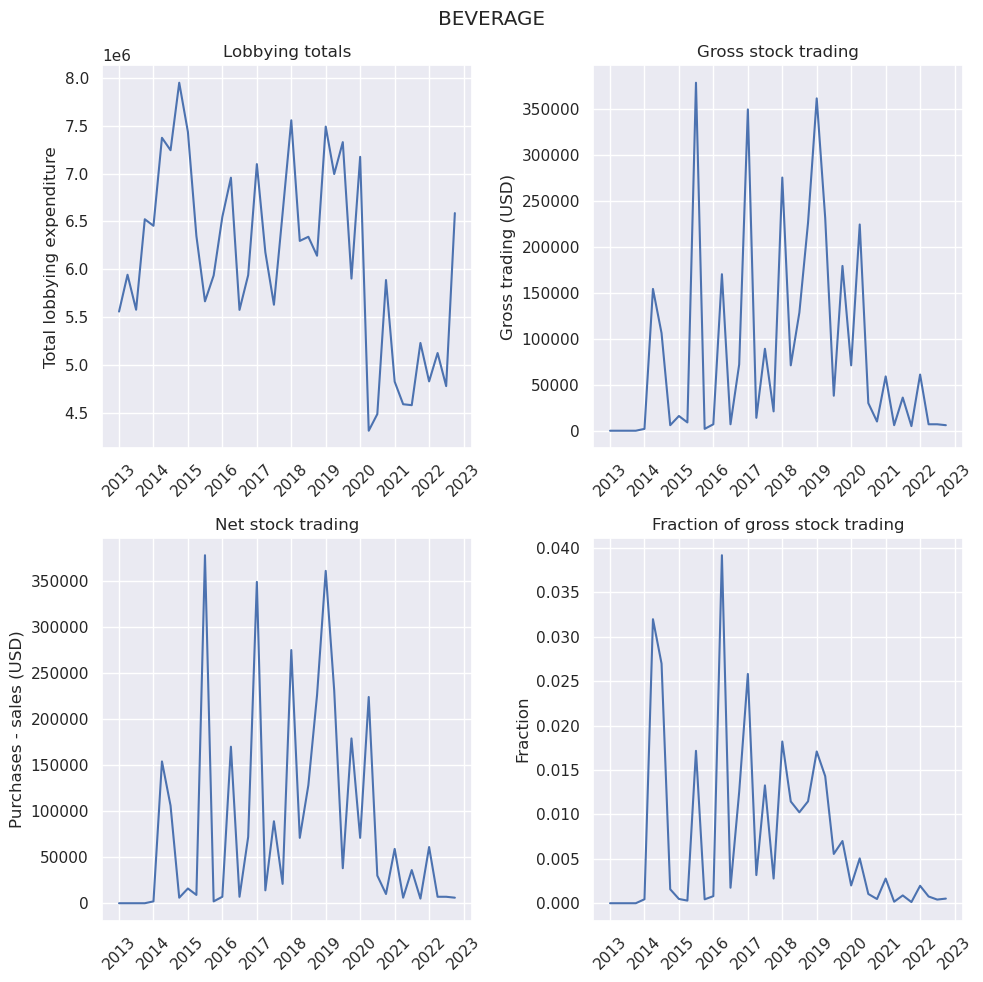

In [79]:
issue_codes = "BEV"
stock_cats = ["Beverages - Brewers", "Beverages - Non-Alcoholic", "Wineries and Distilleries"]
category_name = "Beverage"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

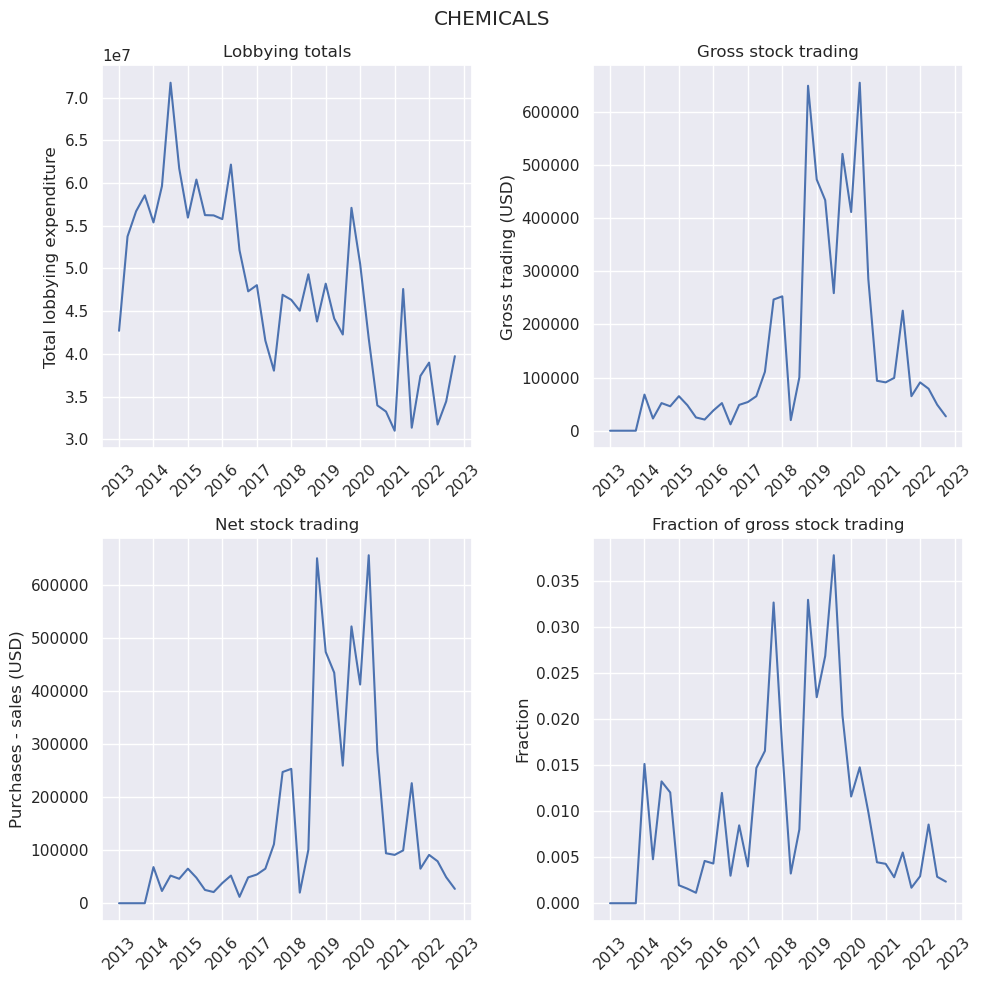

In [80]:
issue_codes = "CHM"
stock_cats = ["Chemicals", "Specialty Chemicals"]
category_name = "Chemicals"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

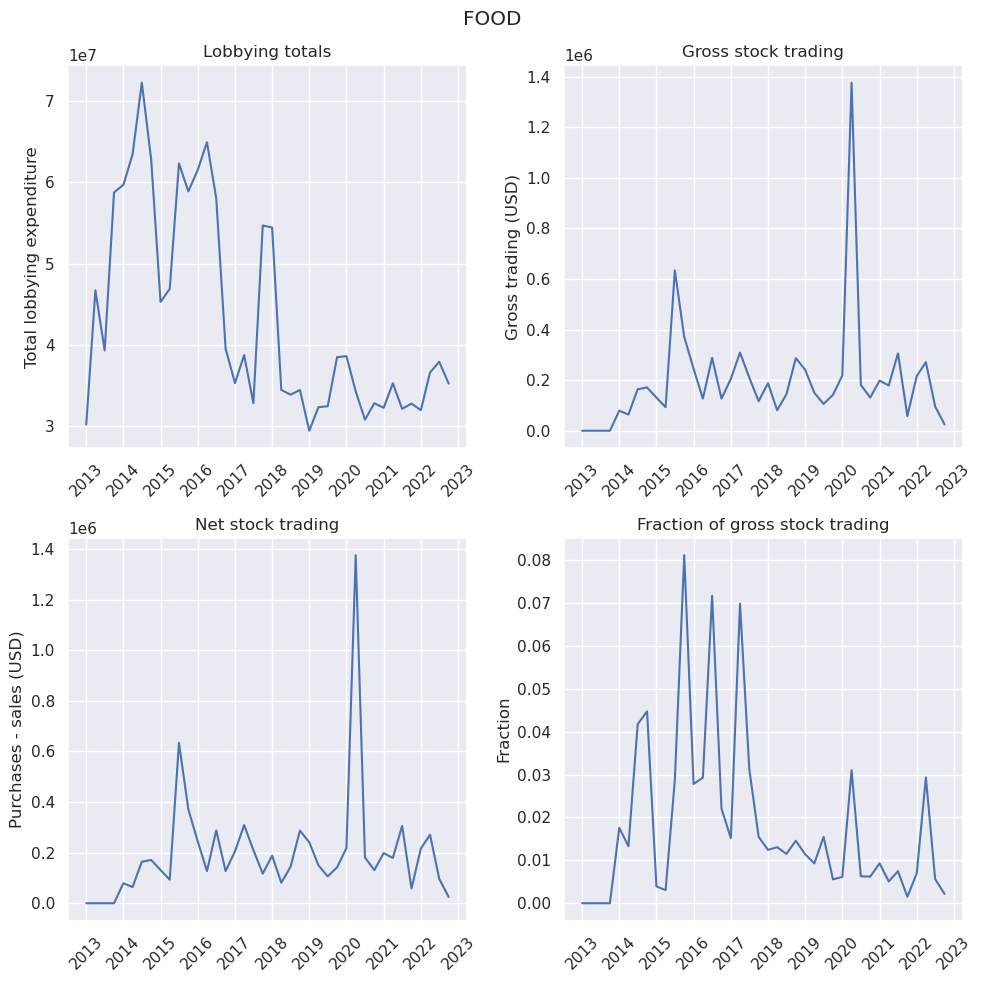

In [81]:
issue_codes = "FOO"
stock_cats = ["Confectioners", "Food Distribution", "Grocery Stores", "Packaged Foods", "Restaurants"]
category_name = "Food"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

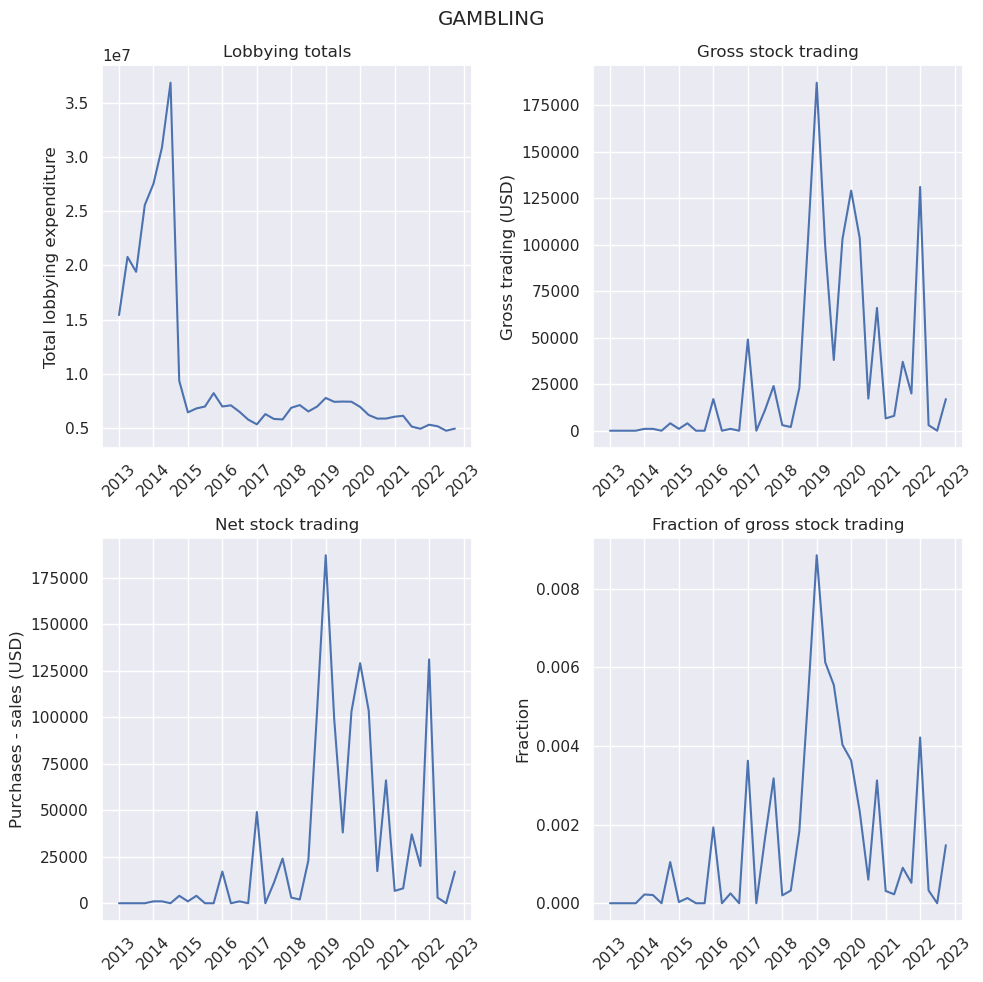

In [82]:
issue_codes = "GAM"
stock_cats = ["Gambling", "Resorts & Casinos"]
category_name = "Gambling"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

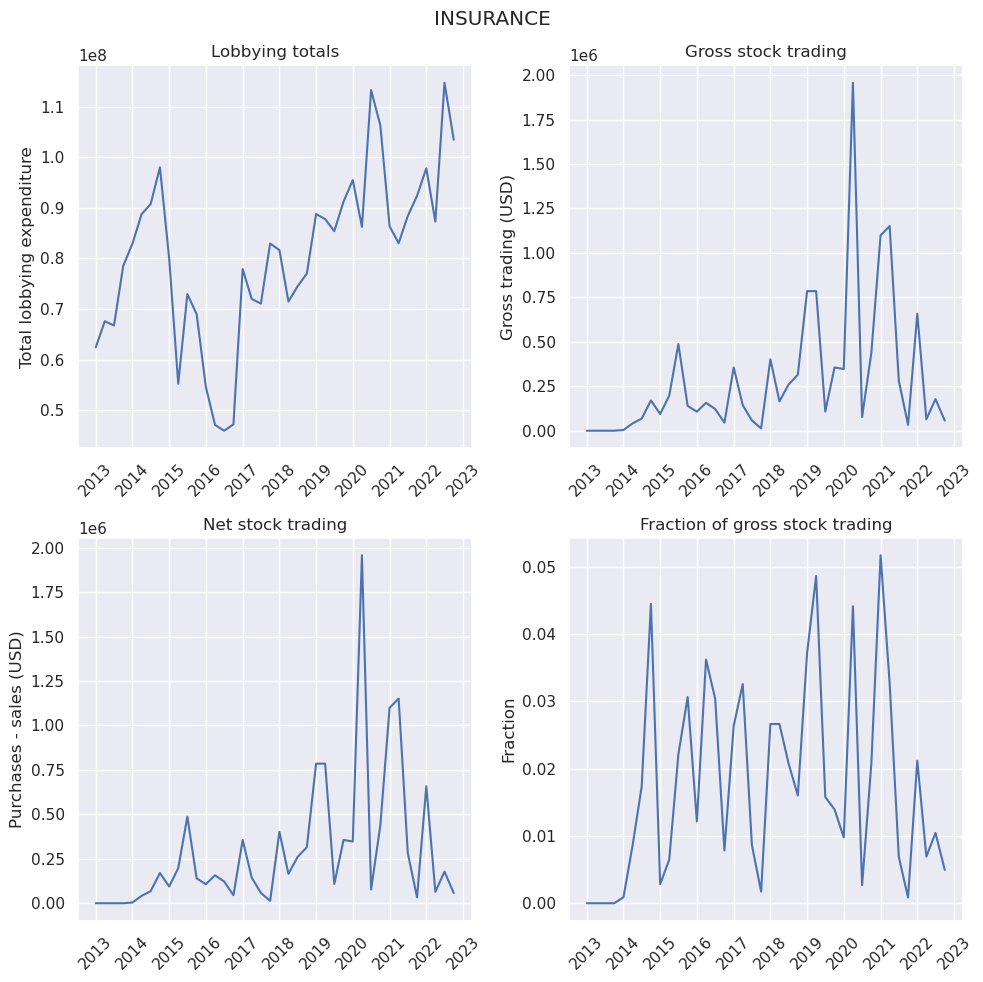

In [84]:
issue_codes = "INS"
stock_cats = ['Insurance - Life', 'Insurance - Property & Casualty',
       'Insurance - Diversified', 'Insurance Brokers',
       'Insurance - Specialty', 'Insurance - Reinsurance']
category_name = "Insurance"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

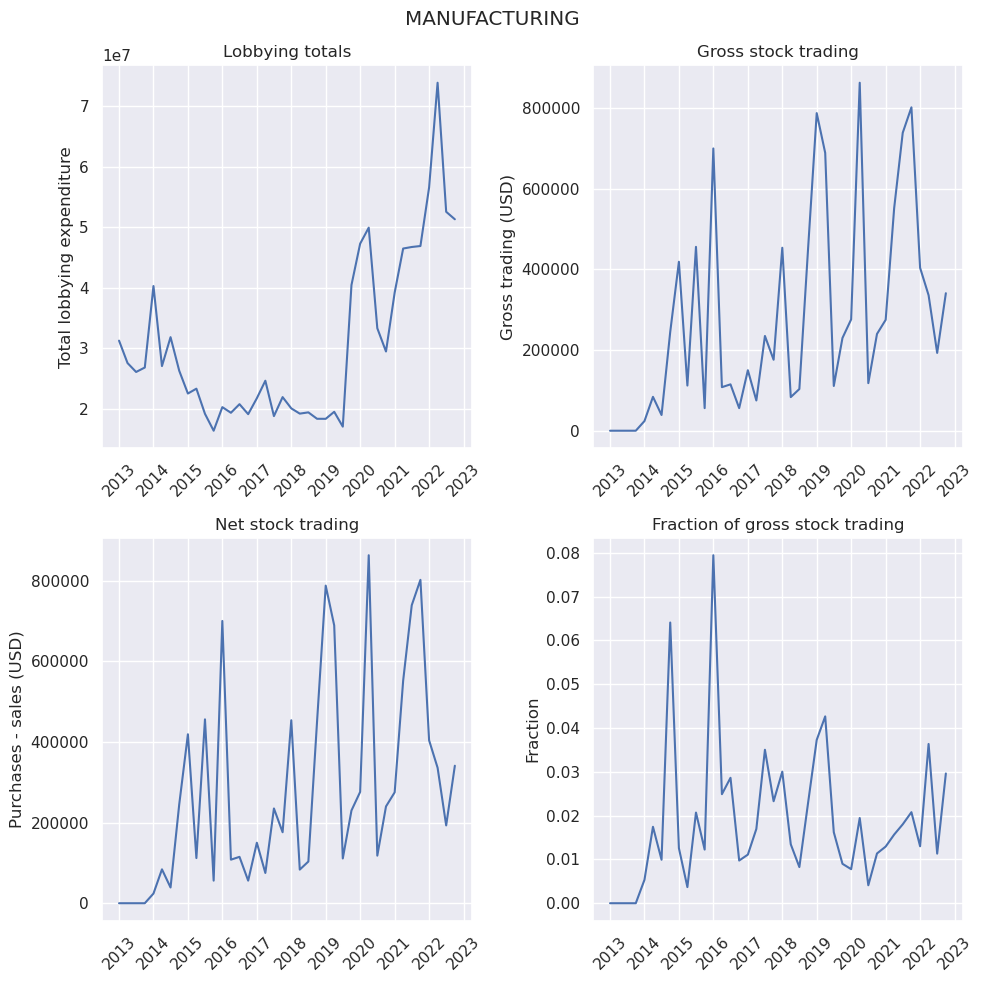

In [85]:
issue_codes = "MAN"
stock_cats = ["Metal Fabrication", "Specialty Industrial Machinery", "Steel", "Textile Manufacturing"]
category_name = "Manufacturing"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

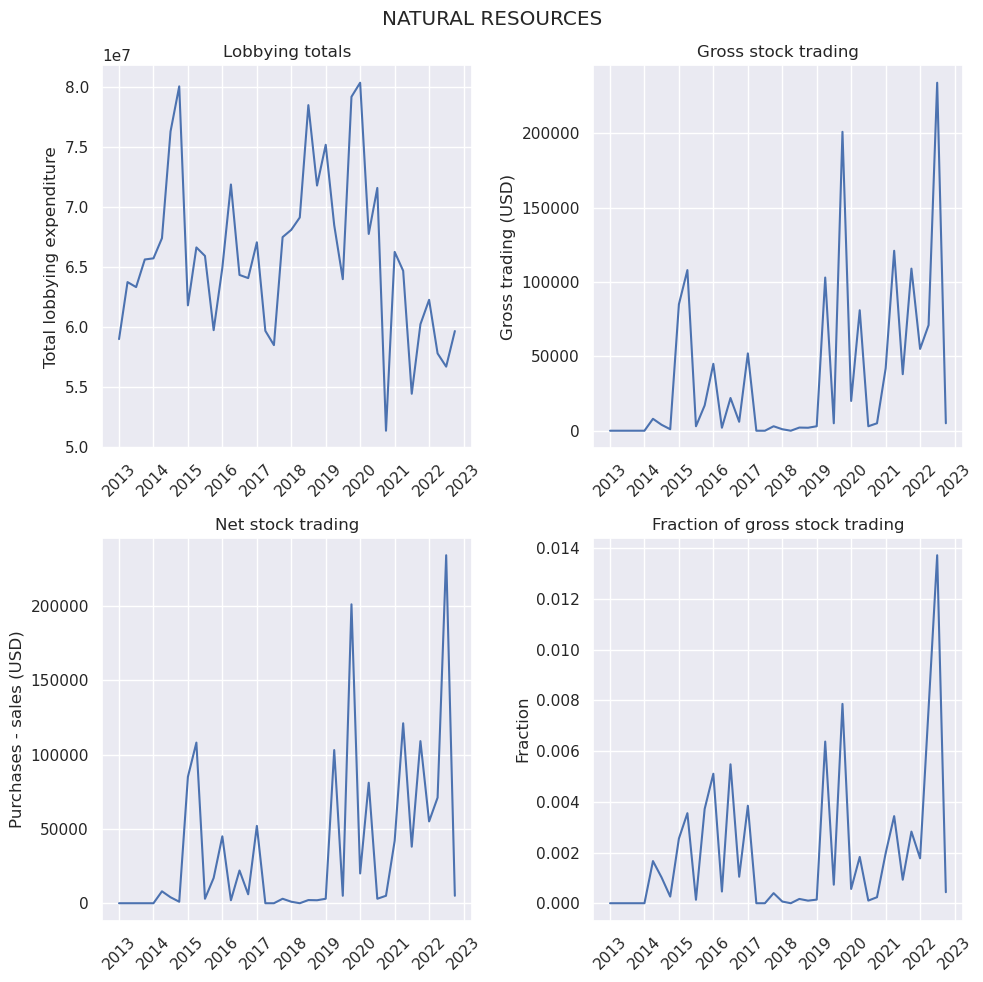

In [86]:
issue_codes = "NAT"
stock_cats = ["Aluminum", "Coking Coal", "Copper", "Gold", "Lumber & Wood Production", "Other Industrial Metals & Mining",
              "Other Precious Metals & Mining", "Silver", "Uranium"]
category_name = "Natural Resources"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)


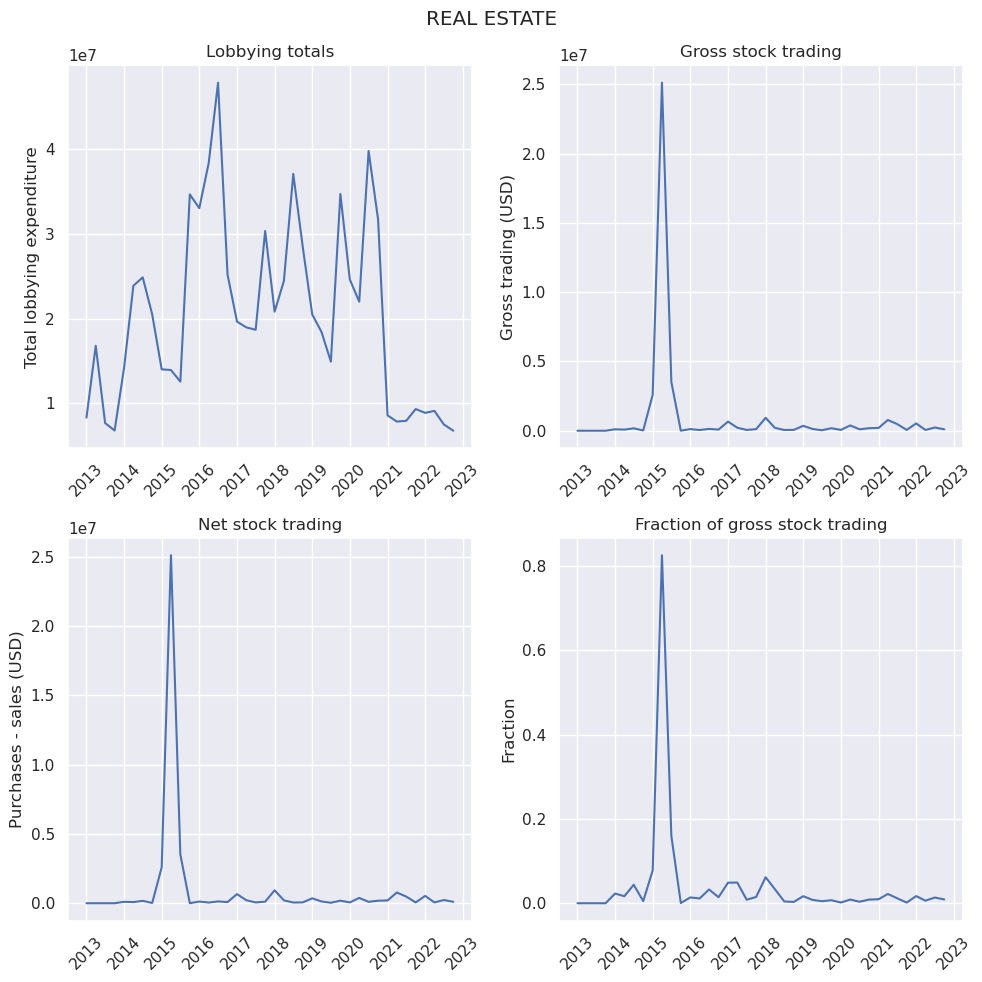

In [89]:
issue_codes = "RES"
stock_cats = ['Real Estate Services', 'Real Estate - Development',
       'Real Estate - Diversified', 'REIT - Specialty', 'REIT - Healthcare Facilities',
       'REIT - Mortgage', 'REIT - Retail', 'REIT - Office',
       'REIT - Residential', 'REIT - Diversified', 'REIT - Industrial',
       'REIT - Hotel & Motel', 'REIT - Mortgate']
category_name = "Real Estate"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)


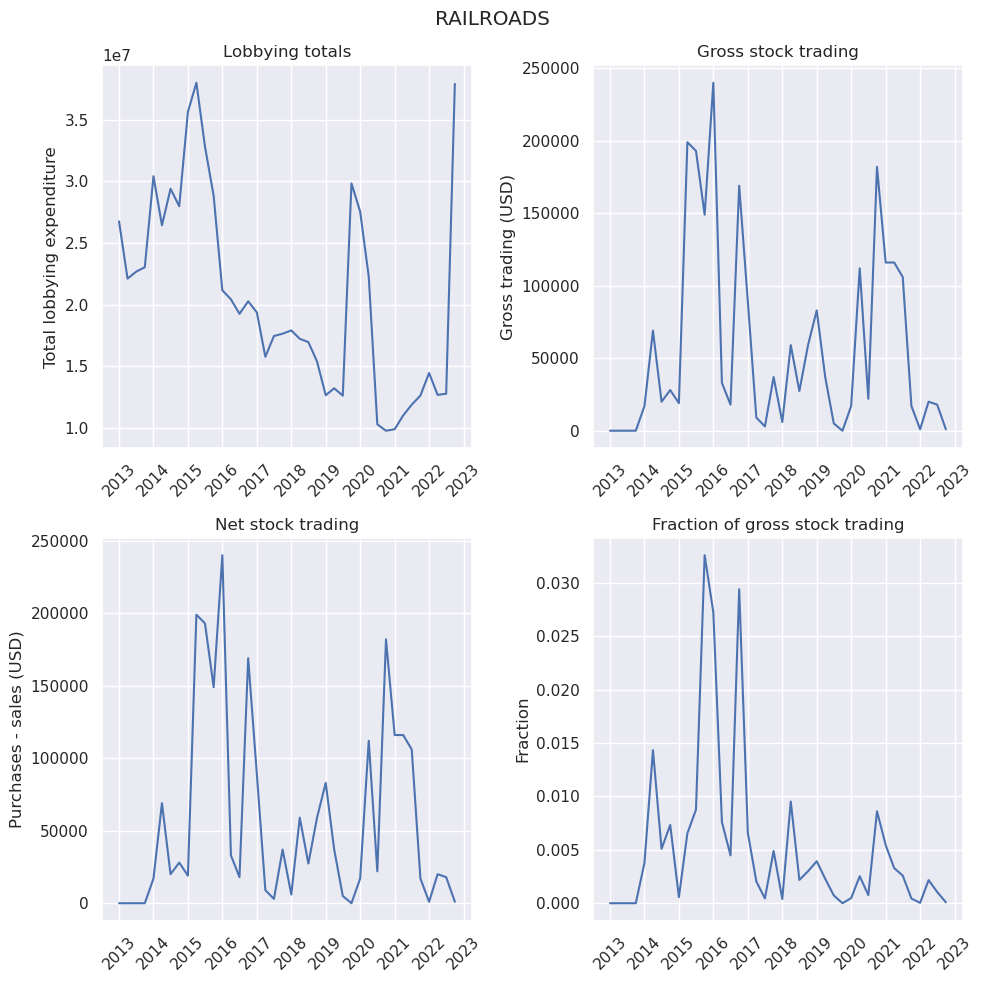

In [90]:
issue_codes = "RRR"
stock_cats = "Railroads"
category_name = "Railroads"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

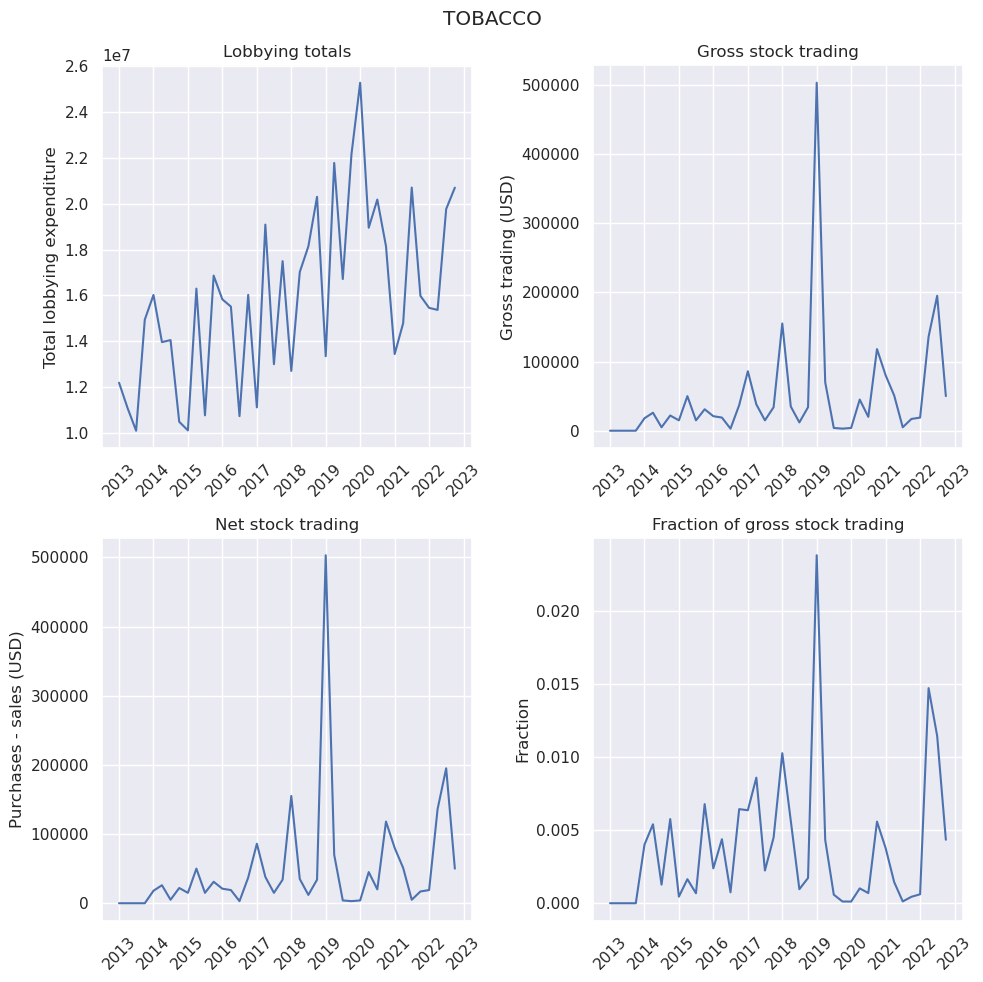

In [91]:
issue_codes = "TOB"
stock_cats = "Tobacco"
category_name = "Tobacco"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)

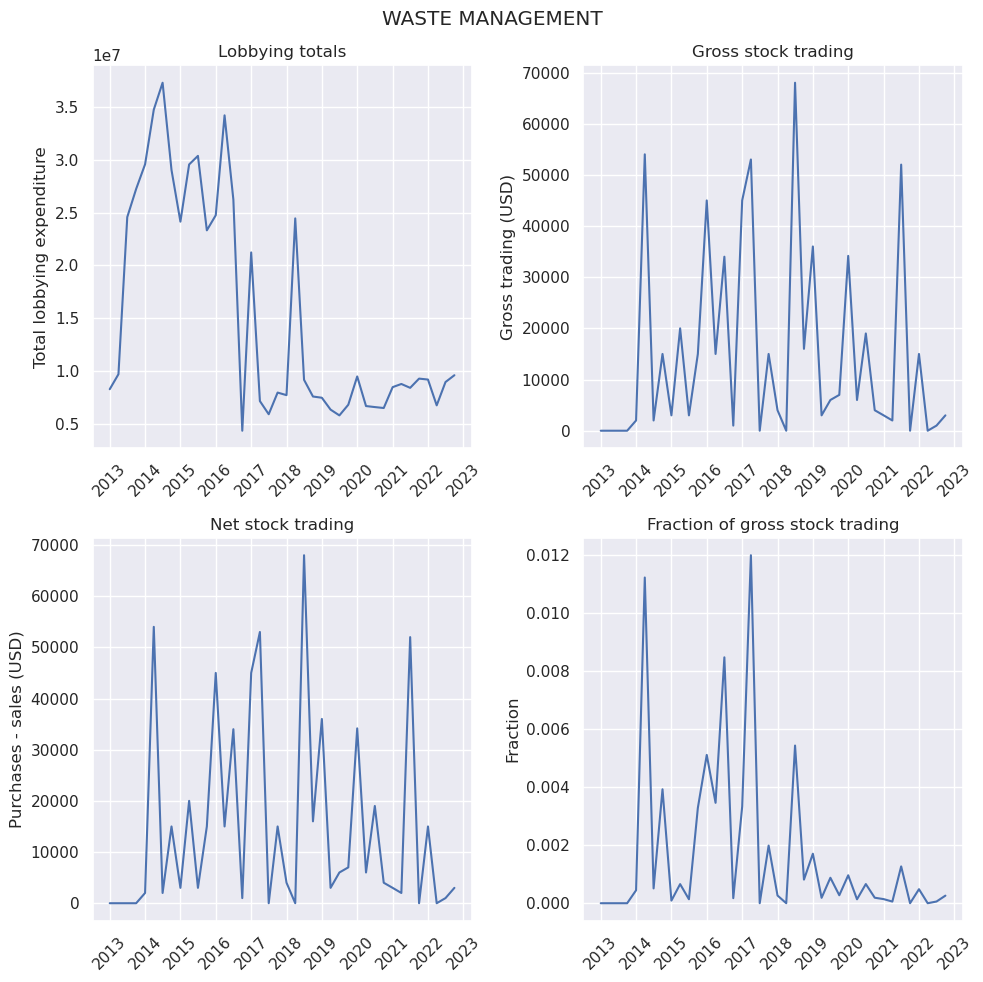

In [92]:
issue_codes = "WAS"
stock_cats = ["Pollution & Treatment Controls", "Waste Management"]
category_name = "Waste Management"
plot_lobbying_vs_stocks(issue_codes, stock_cats, category_name)